<a href="https://colab.research.google.com/github/notKguin/MMK-Informservice/blob/main/final_project/project/ML_intensive_final_project_correlation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Настройки

In [66]:
%config InlineBackend.figure_format='retina'

In [67]:
# pd.set_option('display.max_columns', None) # Убираем ограничение в количестве столбцов
# pd.set_option('display.max_rows', None) # Убираем ограничение в количестве строк

In [68]:
# pd.reset_option('display.max_columns') # Сбрасываем ограничение по умолчанию в количестве столбцов
# pd.reset_option('display.max_rows') # Сбрасываем ограничение по умолчанию в количестве строк

# Загрузка датасета

In [69]:
import pandas as pd
from google.colab import drive

In [70]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [71]:
df = pd.read_csv('/content/drive/MyDrive/MMK_inforservice/datasets/ML-intensive_final_project_cleaned.csv')

In [72]:
print(f"Пропуски (NaN): {df.isna().sum().sum()}")

Пропуски (NaN): 0


In [73]:
df

Количество чугуна (т)  Удельный расход кокса (кг/т)  \
0                  4359.847                    457.062565   
1                  4425.385                    450.109336   
2                  4372.657                    464.184705   
3                  4447.549                    455.028522   
4                  4441.511                    467.232935   
...                     ...                           ...   
1548               5141.843                    404.566088   
1549               5251.577                    401.616894   
1550               5305.734                    401.454022   
1551               5360.082                    402.017341   
1552               5288.666                    407.751670   

      Расход холодного дутья (м³/ч)  t горячего дутья (°С)  \
0                       214677.1855            1055.686386   
1                       214572.0651            1063.769384   
2                       216907.2760            1060.716365   
3                       217341.6706            1058.044291   
4                       223169.5814            1060.088181   
...                             ...                    ...   
1548                    264492.2077            1002.055957   
1549                    268069.9850            1002.480761   
1550                    267186.0690            1005.178185   
1551                    266981.6263            1002.133046   
1552                    269118.9583            1002.953089   

      Расход природного газа (м³/ч)  t природного газа (°С)  \
0                       15916.95805               14.137502   
1                       15998.28292               14.479280   
2                       15984.38981               14.486326   
3                       15975.46354               15.821851   
4                       15999.31665               18.935655   
...                             ...                     ...   
1548                    29951.71387                4.641559   
1549                    29905.31812                6.578101   
1550                    29838.85042                5.593211   
1551                    29622.66935                5.351993   
1552                    29912.03947                4.774703   

      Содержание кислорода в дутье (%)  Расход пара на увлажнение (т/ч)  \
0                            26.303000                         0.145088   
1                            26.500450                         0.131811   
2                            26.511465                         0.117763   
3                            26.622388                         0.128866   
4                            26.354216                         0.129629   
...                                ...                              ...   
1548                         28.243637                         0.274634   
1549                         28.291484                         0.117235   
1550                         28.148714                         0.388080   
1551                         27.909949                         0.595022   
1552                         27.716874                         0.313439   

      Перепад давлений общий (ат)  t чугуна на выпуске (лётка 1) (°С)  ...  \
0                        1.263071                         1426.482414  ...   
1                        1.251254                         1405.902726  ...   
2                        1.266771                         1412.283513  ...   
3                        1.287075                         1405.132286  ...   
4                        1.259818                         1397.118019  ...   
...                           ...                                 ...  ...   
1548                     1.415406                         1400.620991  ...   
1549                     1.410153                         1382.615995  ...   
1550                     1.383210                         1385.925755  ...   
1551                     1.406916                         1400.620991  ...   
1552        

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1553 entries, 0 to 1552
Data columns (total 86 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Количество чугуна (т)                      1553 non-null   float64
 1   Удельный расход кокса (кг/т)               1553 non-null   float64
 2   Расход холодного дутья (м³/ч)              1553 non-null   float64
 3   t горячего дутья (°С)                      1553 non-null   float64
 4   Расход природного газа (м³/ч)              1553 non-null   float64
 5   t природного газа (°С)                     1553 non-null   float64
 6   Содержание кислорода в дутье (%)           1553 non-null   float64
 7   Расход пара на увлажнение (т/ч)            1553 non-null   float64
 8   Перепад давлений общий (ат)                1553 non-null   float64
 9   t чугуна на выпуске (лётка 1) (°С)         1553 non-null   float64
 10  t чугуна на выпуске (лёт

# Отбор признаков исходя из пропусков и корреляции


In [75]:
targets = ["Количество чугуна (т)", "Удельный расход кокса (кг/т)"]
corr_with_targets = df.corr()[targets].abs()

In [76]:
mask_target1 = corr_with_targets[targets[0]] >= 0.5
mask_target2 = corr_with_targets[targets[1]] >= 0.5
cols_to_keep = df.columns[mask_target1 | mask_target2]

In [77]:
cols_to_drop = df.columns.difference(cols_to_keep)

In [78]:
print("Столбцы, которые будут удалены:")
print(cols_to_drop.tolist())
print(f"\nВсего будет удалено: {len(cols_to_drop)} столбцов")

Столбцы, которые будут удалены:
['Al₂O₃', 'CO в колошниковом газе (%)', 'CO₂ в колошниковом газе (%)', 'CRI', 'CSR', 'CaO', 'Cr', 'Fe', 'FeO', 'H₂ в колошниковом газе (%)', 'MgO', 'MnO', 'N₂ в колошниковом газе (%)', 'Osn', 'P', 'S', 'SiO₂', 'TiO₂', 'Zn', 't горячего дутья (°С)', 't колошникового газа в пылеуловителе (°С)', 't периферийных газов 1 (°С)', 't периферийных газов 2 (°С)', 't периферийных газов 3 (°С)', 't периферийных газов 6 (°С)', 't природного газа (°С)', 't чугуна на выпуске (лётка 1) (°С)', 't чугуна на выпуске (лётка 2) (°С)', 'Бар М10', 'Бар М25', 'Влага', 'Давление колошникового газа (ат)', 'Доля агломерата', 'Зола', 'Кокс +80 мм', 'Кокс -25 мм', 'Кокс 40-25 мм', 'Кокс 60-40 мм', 'Кокс 80-60 мм', 'Колошниковый газ (CO)', 'Колошниковый газ (CO₂)', 'Летучие', 'Перепад давлений верхний (ат)', 'Положение клапана малый снорт (%)', 'Расход пара на увлажнение (т/ч)', 'Сера К', 'Содержание кислорода в дутье (%)', 'Углерод', 'Уровень засыпи (юг) (м)', 'Чугун.C', 'Чугун.Cr',

In [79]:
corr_with_targets

Количество чугуна (т)  \
Количество чугуна (т)                       1.000000   
Удельный расход кокса (кг/т)                0.671426   
Расход холодного дутья (м³/ч)               0.741365   
t горячего дутья (°С)                       0.190865   
Расход природного газа (м³/ч)               0.793642   
...                                              ...   
O₂ в горячем дутье                          0.515822   
Доля агломерата                             0.100767   
Колошниковый газ (CO₂)                      0.360293   
Колошниковый газ (CO)                       0.142532   
Колошниковый газ (H₂)                       0.525165   

                               Удельный расход кокса (кг/т)  
Количество чугуна (т)                              0.671426  
Удельный расход кокса (кг/т)                       1.000000  
Расход холодного дутья (м³/ч)                      0.573488  
t горячего дутья (°С)                              0.060518  
Расход природного газа (м³/ч)                      0.769560  
...                                                     ...  
O₂ в горячем дутье                                 0.467537  
Доля агломерата                                    0.077834  
Колошниковый газ (CO₂)                             0.272091  
Колошниковый газ (CO)                              0.419106  
Колошниковый газ (H₂)                              0.539297  

[86 rows x 2 columns]

In [80]:
df = df[cols_to_keep]

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1553 entries, 0 to 1552
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Количество чугуна (т)            1553 non-null   float64
 1   Удельный расход кокса (кг/т)     1553 non-null   float64
 2   Расход холодного дутья (м³/ч)    1553 non-null   float64
 3   Расход природного газа (м³/ч)    1553 non-null   float64
 4   Перепад давлений общий (ат)      1553 non-null   float64
 5   Перепад давлений нижний (ат)     1553 non-null   float64
 6   Выход колошникового газа (м³/ч)  1553 non-null   float64
 7   t колошникового газа 1 (°С)      1553 non-null   float64
 8   t колошникового газа 2 (°С)      1553 non-null   float64
 9   t колошникового газа 3 (°С)      1553 non-null   float64
 10  t колошникового газа 4 (°С)      1553 non-null   float64
 11  Уровень засыпи (запад) (м)       1553 non-null   float64
 12  Уровень засыпи (вост

---
Удалено столбцов: 19  

---
Список:  
1. Вода на охлаждение. Водовод 1. Расход (м³/ч)
2. Вода на охлаждение. Водовод 2. Расход (м³/ч)  
3. Вода на охлаждение. Водовод 3. Расход (м³/ч)  
4. Чугун.Cr  
5. Чугун.Cu  
6. Чугун.Mn  
7. Чугун.Ni   
8. Чугун.S  
9. Чугун.V  
10. Шлак.Al₂O₃  
11. Шлак.CaO  
12. Шлак.FeO  
13. Шлак.Ko  
14. Шлак.MgO  
15. Шлак.MnO  
16. Шлак.NaO  
17. Шлак.S  
18. Шлак.SiO₂  
19. Шлак.TiO₂
---

# Графический анализ корреляции

## Таргет «Количество чугуна (т)»

### Общий анализ признаков

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

In [83]:
target_1 = 'Количество чугуна (т)'
corr_chugun = df.corr()[target_1].drop([target_1, 'Удельный расход кокса (кг/т)']).sort_values(ascending=False)
corr_chugun = corr_chugun[abs(corr_chugun) >= 0.5]

In [84]:
corr_chugun

Перепад давлений общий (ат)        0.899516
Перепад давлений нижний (ат)       0.802621
Расход природного газа (м³/ч)      0.793642
Расход холодного дутья (м³/ч)      0.741365
Выход колошникового газа (м³/ч)    0.611846
Колошниковый газ (H₂)              0.525165
O₂ в горячем дутье                 0.515822
t периферийных газов 4 (°С)       -0.507429
t колошникового газа 2 (°С)       -0.533581
t колошникового газа 1 (°С)       -0.534597
Уровень засыпи (север) (м)        -0.559605
t периферийных газов 5 (°С)       -0.577121
t колошникового газа 4 (°С)       -0.609613
t колошникового газа 3 (°С)       -0.628544
Уровень засыпи (запад) (м)        -0.666738
Уровень засыпи (восток) (м)       -0.706840
Name: Количество чугуна (т), dtype: float64

In [85]:
positive_corr_chugun = corr_chugun[corr_chugun > 0].sort_values(ascending=False)
negative_corr_chugun = corr_chugun[corr_chugun < 0].sort_values(ascending=True)

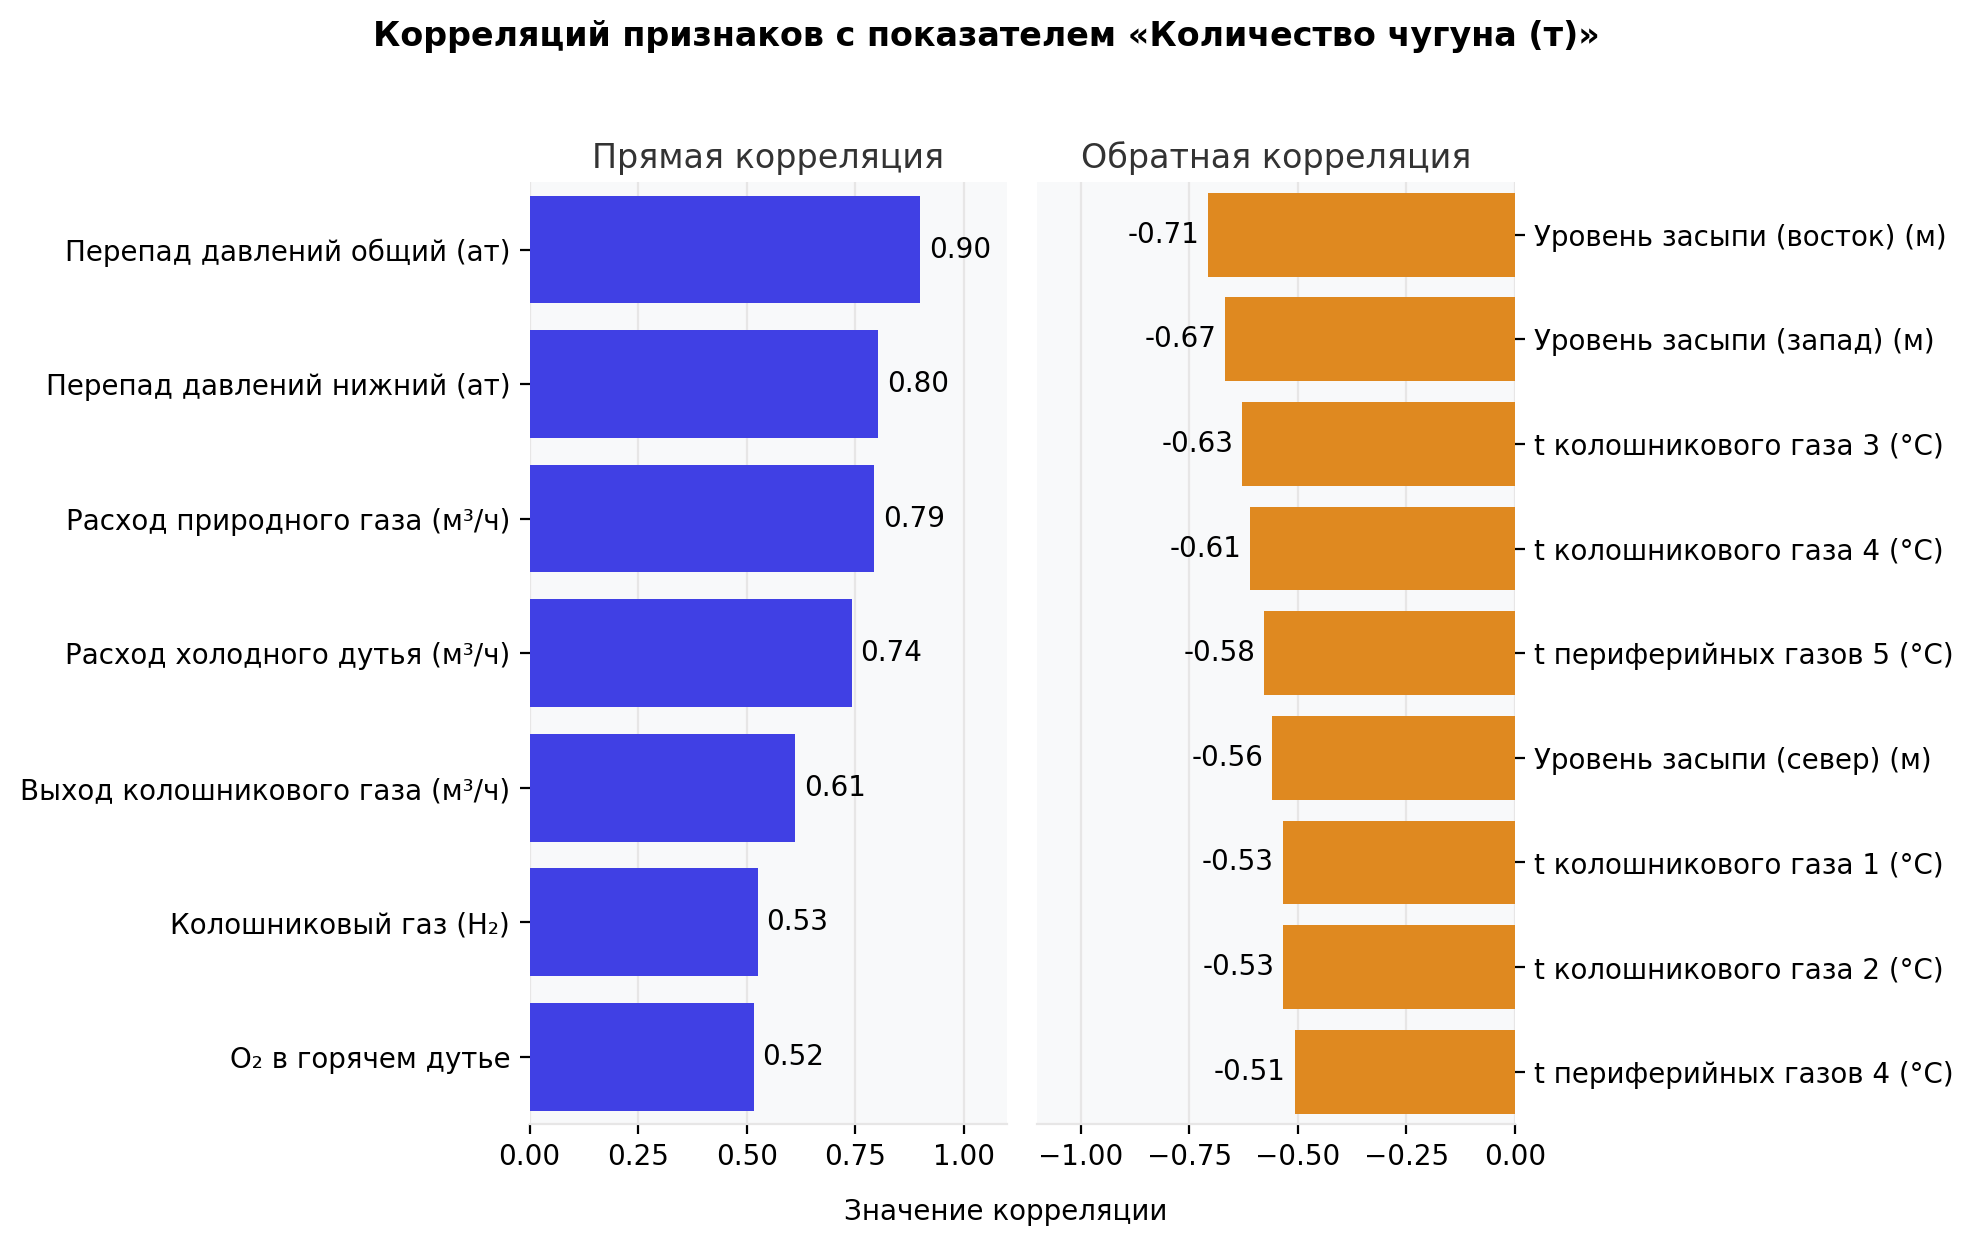

In [141]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6), sharey=False)
fig.text(0.51, 0.02, "Значение корреляции", ha='center')
fig.suptitle(f"Корреляций признаков с показателем «{target_1}»", weight='bold', y=1.02)

# График ПРЯМОЙ корреляции
sns.barplot(x=positive_corr_chugun.values, y=positive_corr_chugun.index, palette=['#2525FF']*len(positive_corr_chugun), hue=positive_corr_chugun.index, legend=False, ax=ax1)
ax1.set_title("Прямая корреляция", pad=5, alpha=0.8)
ax1.set_xlim(0, 1.1)
ax1.tick_params(axis='y')
ax1.set_xlabel("")

for i, v in enumerate(positive_corr_chugun.values):
    ax1.text(v + 0.02, i, f"{v:.2f}", color='black', ha='left', va='center')

# График ОБРАТНОЙ корреляции
sns.barplot(x=negative_corr_chugun.values, y=negative_corr_chugun.index, palette=['#FF8C00']*len(negative_corr_chugun), hue=negative_corr_chugun.index, legend=False, ax=ax2)
ax2.set_title("Обратная корреляция", pad=5, alpha=0.8)
ax2.set_xlim(-1.1, 0)
ax2.yaxis.tick_right()
ax2.tick_params(axis='y')
ax2.set_xlabel("")

for i, v in enumerate(negative_corr_chugun.values):
    ax2.text(v - 0.02, i, f"{v:.2f}", color='black', ha='right', va='center')

for ax in [ax1, ax2]:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_color('#E7E6E6')
    ax.set_axisbelow(True)
    ax.yaxis.grid(False)
    ax.xaxis.grid(True, color='#E7E6E6')
    ax.set_facecolor('#f8f9fa')
    ax.set_ylabel("")

plt.tight_layout()
plt.subplots_adjust(bottom=0.1)
plt.show()

### Анализ каждого признака по отдельность

In [87]:
import numpy as np

In [109]:
top_features_chugun = corr_chugun.index
n_features_chugun = len(top_features_chugun)

In [110]:
n_cols_chugun = 3
n_rows_chugun = int(np.ceil(n_features_chugun / n_cols_chugun))

In [111]:
y_min_chugun = df['Количество чугуна (т)'].min() * 0.95
y_max_chugun = df['Количество чугуна (т)'].max() * 1.05

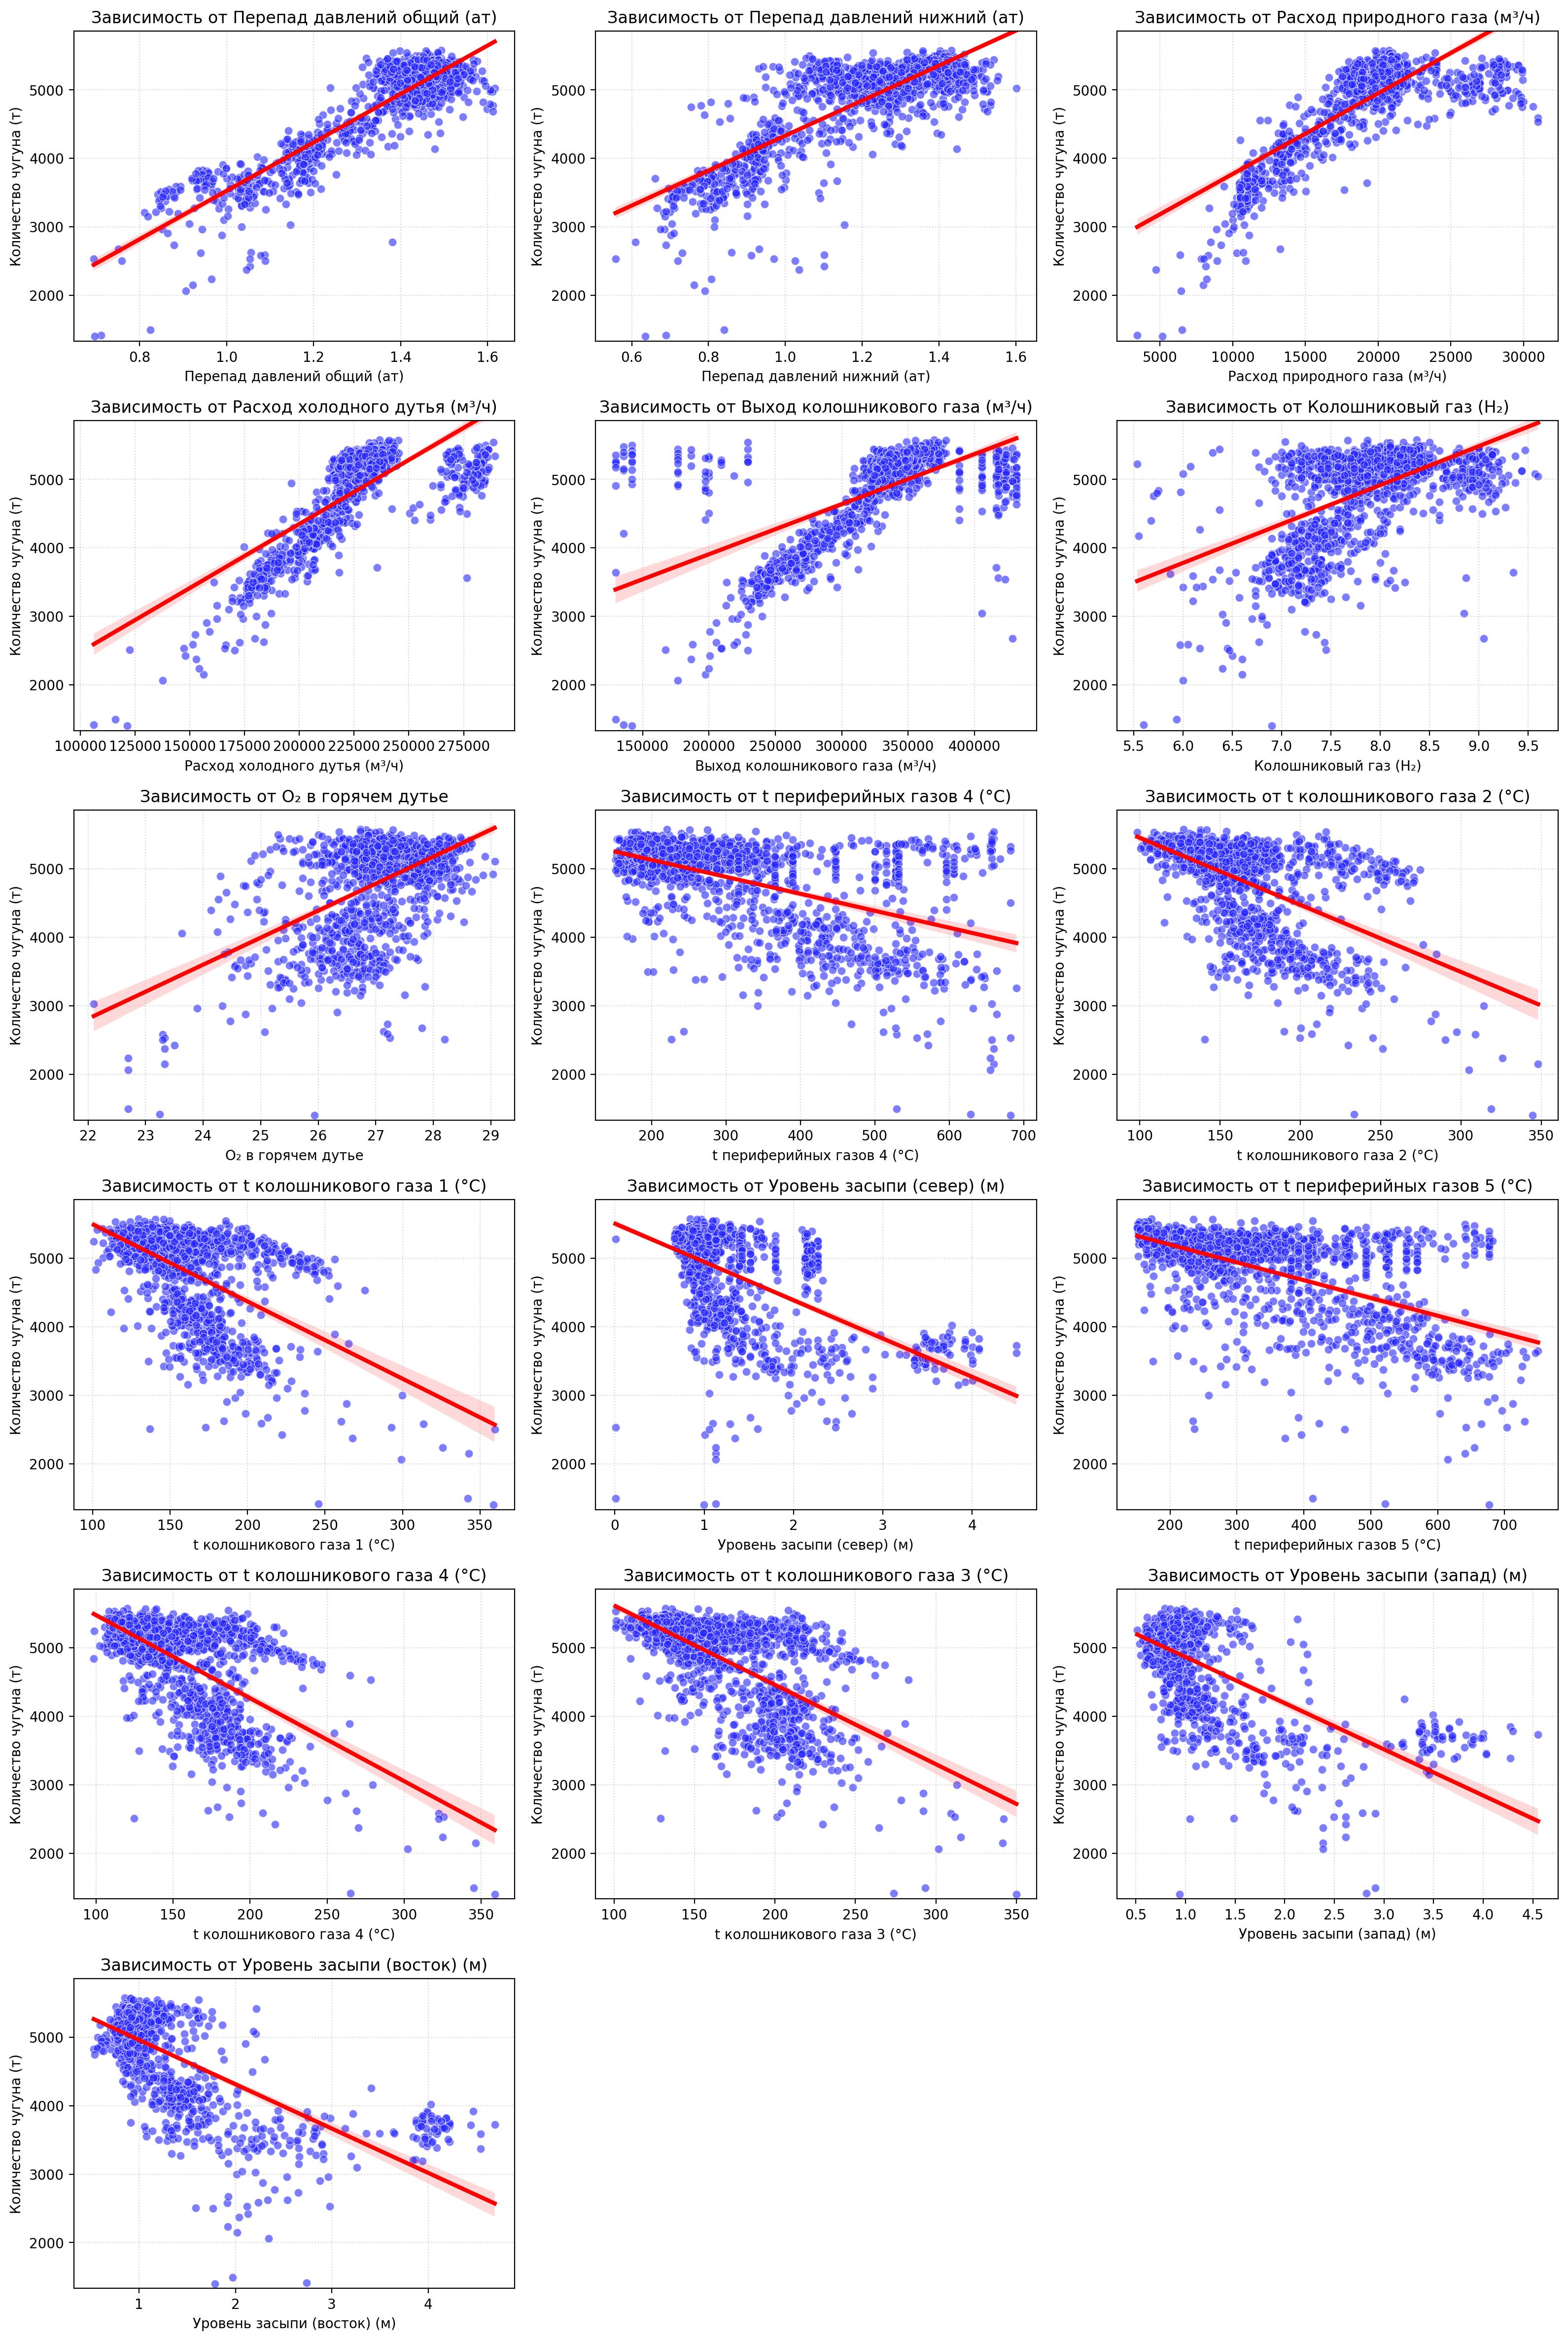

In [140]:
fig, axes = plt.subplots(n_rows_chugun, n_cols_chugun, figsize=(16, 4*n_rows_chugun))
fig.suptitle(None)

for i, feature in enumerate(top_features_chugun):
    ax = axes.flatten()[i] if n_features_chugun > 1 else axes

    sns.scatterplot(x=df[feature], y=df['Количество чугуна (т)'], color='#2525FF', alpha=0.6, ax=ax)

    # Здесь заглядываем в будущее, строя линию линейной регрессии
    sns.regplot(x=df[feature], y=df['Количество чугуна (т)'], scatter=False, color='#FF0000', line_kws={'linewidth': 3}, ax=ax)

    ax.set_title(f"Зависимость от {feature}", fontsize=12)
    ax.set_xlabel(feature, fontsize=10)
    ax.set_ylabel('Количество чугуна (т)', fontsize=10)
    ax.set_ylim(y_min_chugun, y_max_chugun)

    ax.grid(True, linestyle=':', alpha=0.5)

[fig.delaxes(ax) for ax in axes.flatten()[n_features_chugun:]]
plt.tight_layout()
plt.show()

### Итог по анализу признаков

---

#### Кореляция >= 0.5

«Перепад давлений общий (ат)» (0.90) – cильная зависимость: высокий перепад давлений напрямую связан с увеличением выхода чугуна, что указывает на интенсивное восстановление и активное движение газов.

«Перепад давлений нижний (ат)» (0.80) – большой перепад в нижней зоне печи свидетельствует о высокой газодинамической активности, способствующей увеличению производства чугуна.

«Расход природного газа (м³/ч)» (0.79) – увеличение подачи природного газа повышает восстановительный потенциал дутья, что положительно влияет на выход металла.

«Расход холодного дутья (м³/ч)» (0.74) – рост расхода дутья усиливает окислительно-восстановительные процессы, приводя к увеличению объёмов выплавки чугуна.

«Выход колошникового газа (м³/ч)» (0.61) – больший выход газа говорит об эффективном использовании шихты и высокой производительности печи.

«Колошниковый газ (H₂)» (0.53) – повышенное содержание водорода улучшает восстановление оксидов железа, способствуя росту выхода чугуна.

«O₂ в горячем дутье» (0.52) – увеличение кислорода в дутье интенсифицирует горение кокса и тепловыделение, что положительно сказывается на производительности.

---

#### Кореляция <= -0.5
  
«t периферийных газов 4 (°С)» (-0.51) – снижение температуры может указывать на неоптимальный тепловой режим, косвенно влияя на выход чугуна.

«t колошникового газа 2 (°С)» (-0.53) – пониженные температуры в зоне 2 могут свидетельствовать о недостаточном тепловыделении, что ограничивает производительность.

«t колошникового газа 1 (°С)» (-0.53) – аналогично: низкие температуры в верхней части печи говорят о неполном использовании тепла.

«Уровень засыпи (север) (м)» (-0.56) – высокий уровень засыпи на севере может нарушать газораспределение, снижая эффективность плавки.

«t периферийных газов 5 (°С)» (-0.58) – низкие температуры в зоне 5 указывают на потери тепла, что негативно влияет на ход процесса.

«t колошникового газа 4 (°С)» (-0.61) – снижение температуры в этой зоне связано с менее интенсивными восстановительными процессами.

«t колошникового газа 3 (°С)» (-0.63) – холоднее зона 3 → слабее восстановление → меньше чугуна.

«Уровень засыпи (запад) (м)» (-0.67) – перегруз западной стороны ухудшает газопроницаемость, снижая производительность.

«Уровень засыпи (восток) (м)» (-0.71) – наиболее сильная обратная зависимость: высокий уровень на востоке серьёзно нарушает распределение шихты и газов, уменьшая выход металла.

---

## Таргет «Удельный расход кокса (кг/т)»

### Общий анализ признаков

In [113]:
target_2 = 'Удельный расход кокса (кг/т)'
corr_coke = df.corr()[target_2].drop([target_2, 'Количество чугуна (т)']).sort_values(ascending=False)
corr_coke = corr_coke[abs(corr_coke) >= 0.5]

In [142]:
corr_coke

Уровень засыпи (восток) (м)        0.571813
Уровень засыпи (запад) (м)         0.515777
Выход колошникового газа (м³/ч)   -0.510068
Перепад давлений нижний (ат)      -0.519488
Колошниковый газ (H₂)             -0.539297
Расход холодного дутья (м³/ч)     -0.573488
Перепад давлений общий (ат)       -0.631666
Расход природного газа (м³/ч)     -0.769560
Name: Удельный расход кокса (кг/т), dtype: float64

In [115]:
positive_corr_coke = corr_coke[corr_coke > 0].sort_values(ascending=False)
negative_corr_coke = corr_coke[corr_coke < 0].sort_values(ascending=True)

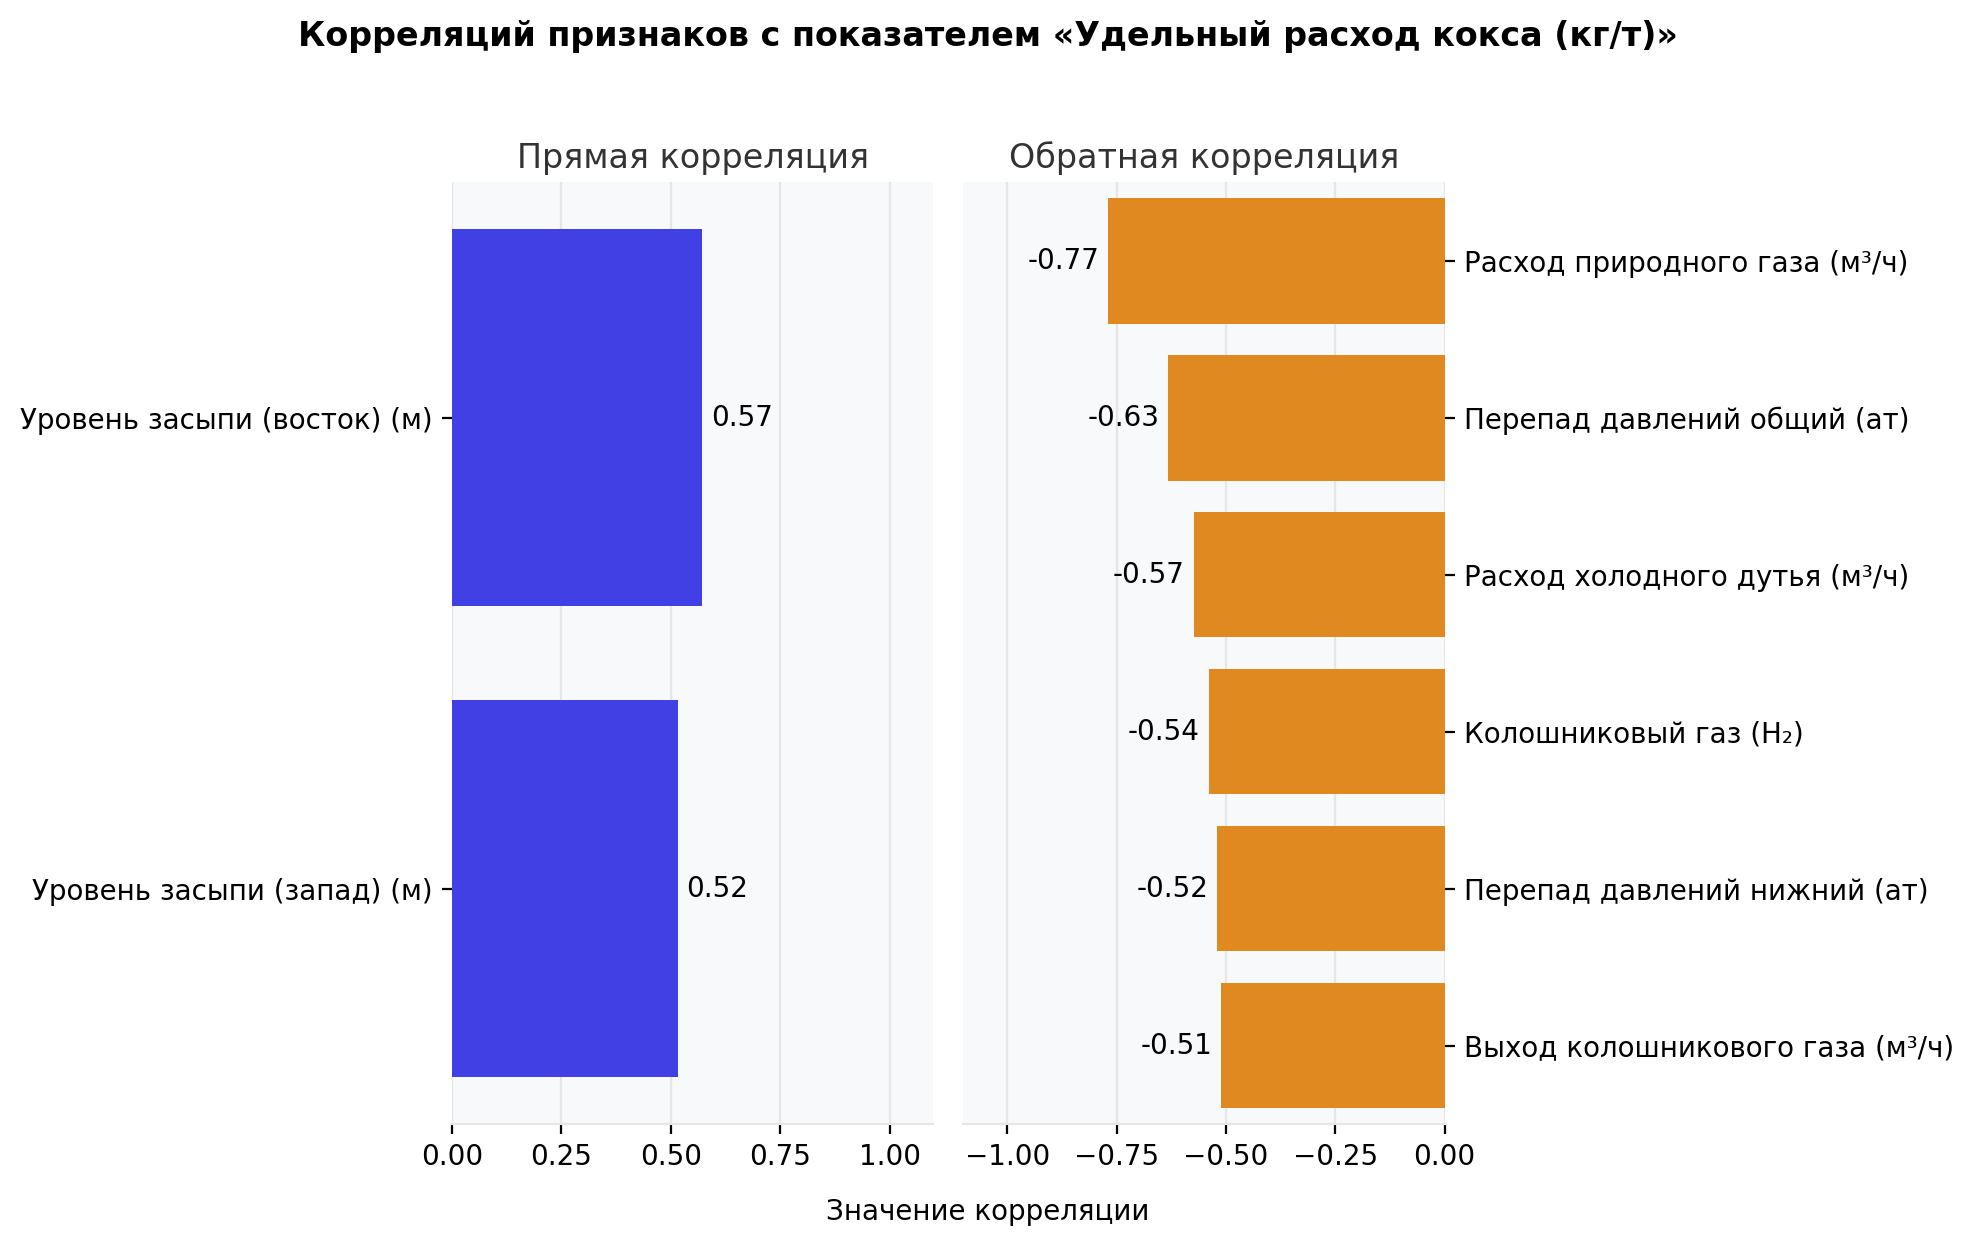

In [143]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6), sharey=False)
fig.text(0.5, 0.02, "Значение корреляции", ha='center')
fig.suptitle(f"Корреляций признаков с показателем «{target_2}»", weight='bold', y=1.02)

# График ПРЯМОЙ корреляции
sns.barplot(x=positive_corr_coke.values, y=positive_corr_coke.index, palette=['#2525FF']*len(positive_corr_coke), hue=positive_corr_coke.index, legend=False, ax=ax1)
ax1.set_title("Прямая корреляция", pad=5, alpha=0.8)
ax1.set_xlim(0, 1.1)
ax1.tick_params(axis='y')
ax1.set_xlabel("")

for i, v in enumerate(positive_corr_coke.values):
    ax1.text(v + 0.02, i, f"{v:.2f}", color='black', ha='left', va='center')

# График ОБРАТНОЙ корреляции
sns.barplot(x=negative_corr_coke.values, y=negative_corr_coke.index, palette=['#FF8C00']*len(negative_corr_coke), hue=negative_corr_coke.index, legend=False, ax=ax2)
ax2.set_title("Обратная корреляция", pad=5, alpha=0.8)
ax2.set_xlim(-1.1, 0)
ax2.yaxis.tick_right()
ax2.tick_params(axis='y')
ax2.set_xlabel("")

for i, v in enumerate(negative_corr_coke.values):
    ax2.text(v - 0.02, i, f"{v:.2f}", color='black', ha='right', va='center')

for ax in [ax1, ax2]:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_color('#E7E6E6')
    ax.set_axisbelow(True)
    ax.yaxis.grid(False)
    ax.xaxis.grid(True, color='#E7E6E6')
    ax.set_facecolor('#f8f9fa')
    ax.set_ylabel("")

plt.tight_layout()
plt.subplots_adjust(bottom=0.1)
plt.show()

### Анализ каждого признака по отдельность

In [117]:
top_features_coke = corr_coke.index
n_features_coke = len(top_features_coke)

In [118]:
n_cols_coke = 3
n_rows_coke = int(np.ceil(n_features_coke / n_cols_coke))

In [119]:
y_min_coke = df['Удельный расход кокса (кг/т)'].min() * 0.95
y_max_coke = df['Удельный расход кокса (кг/т)'].max() * 1.05

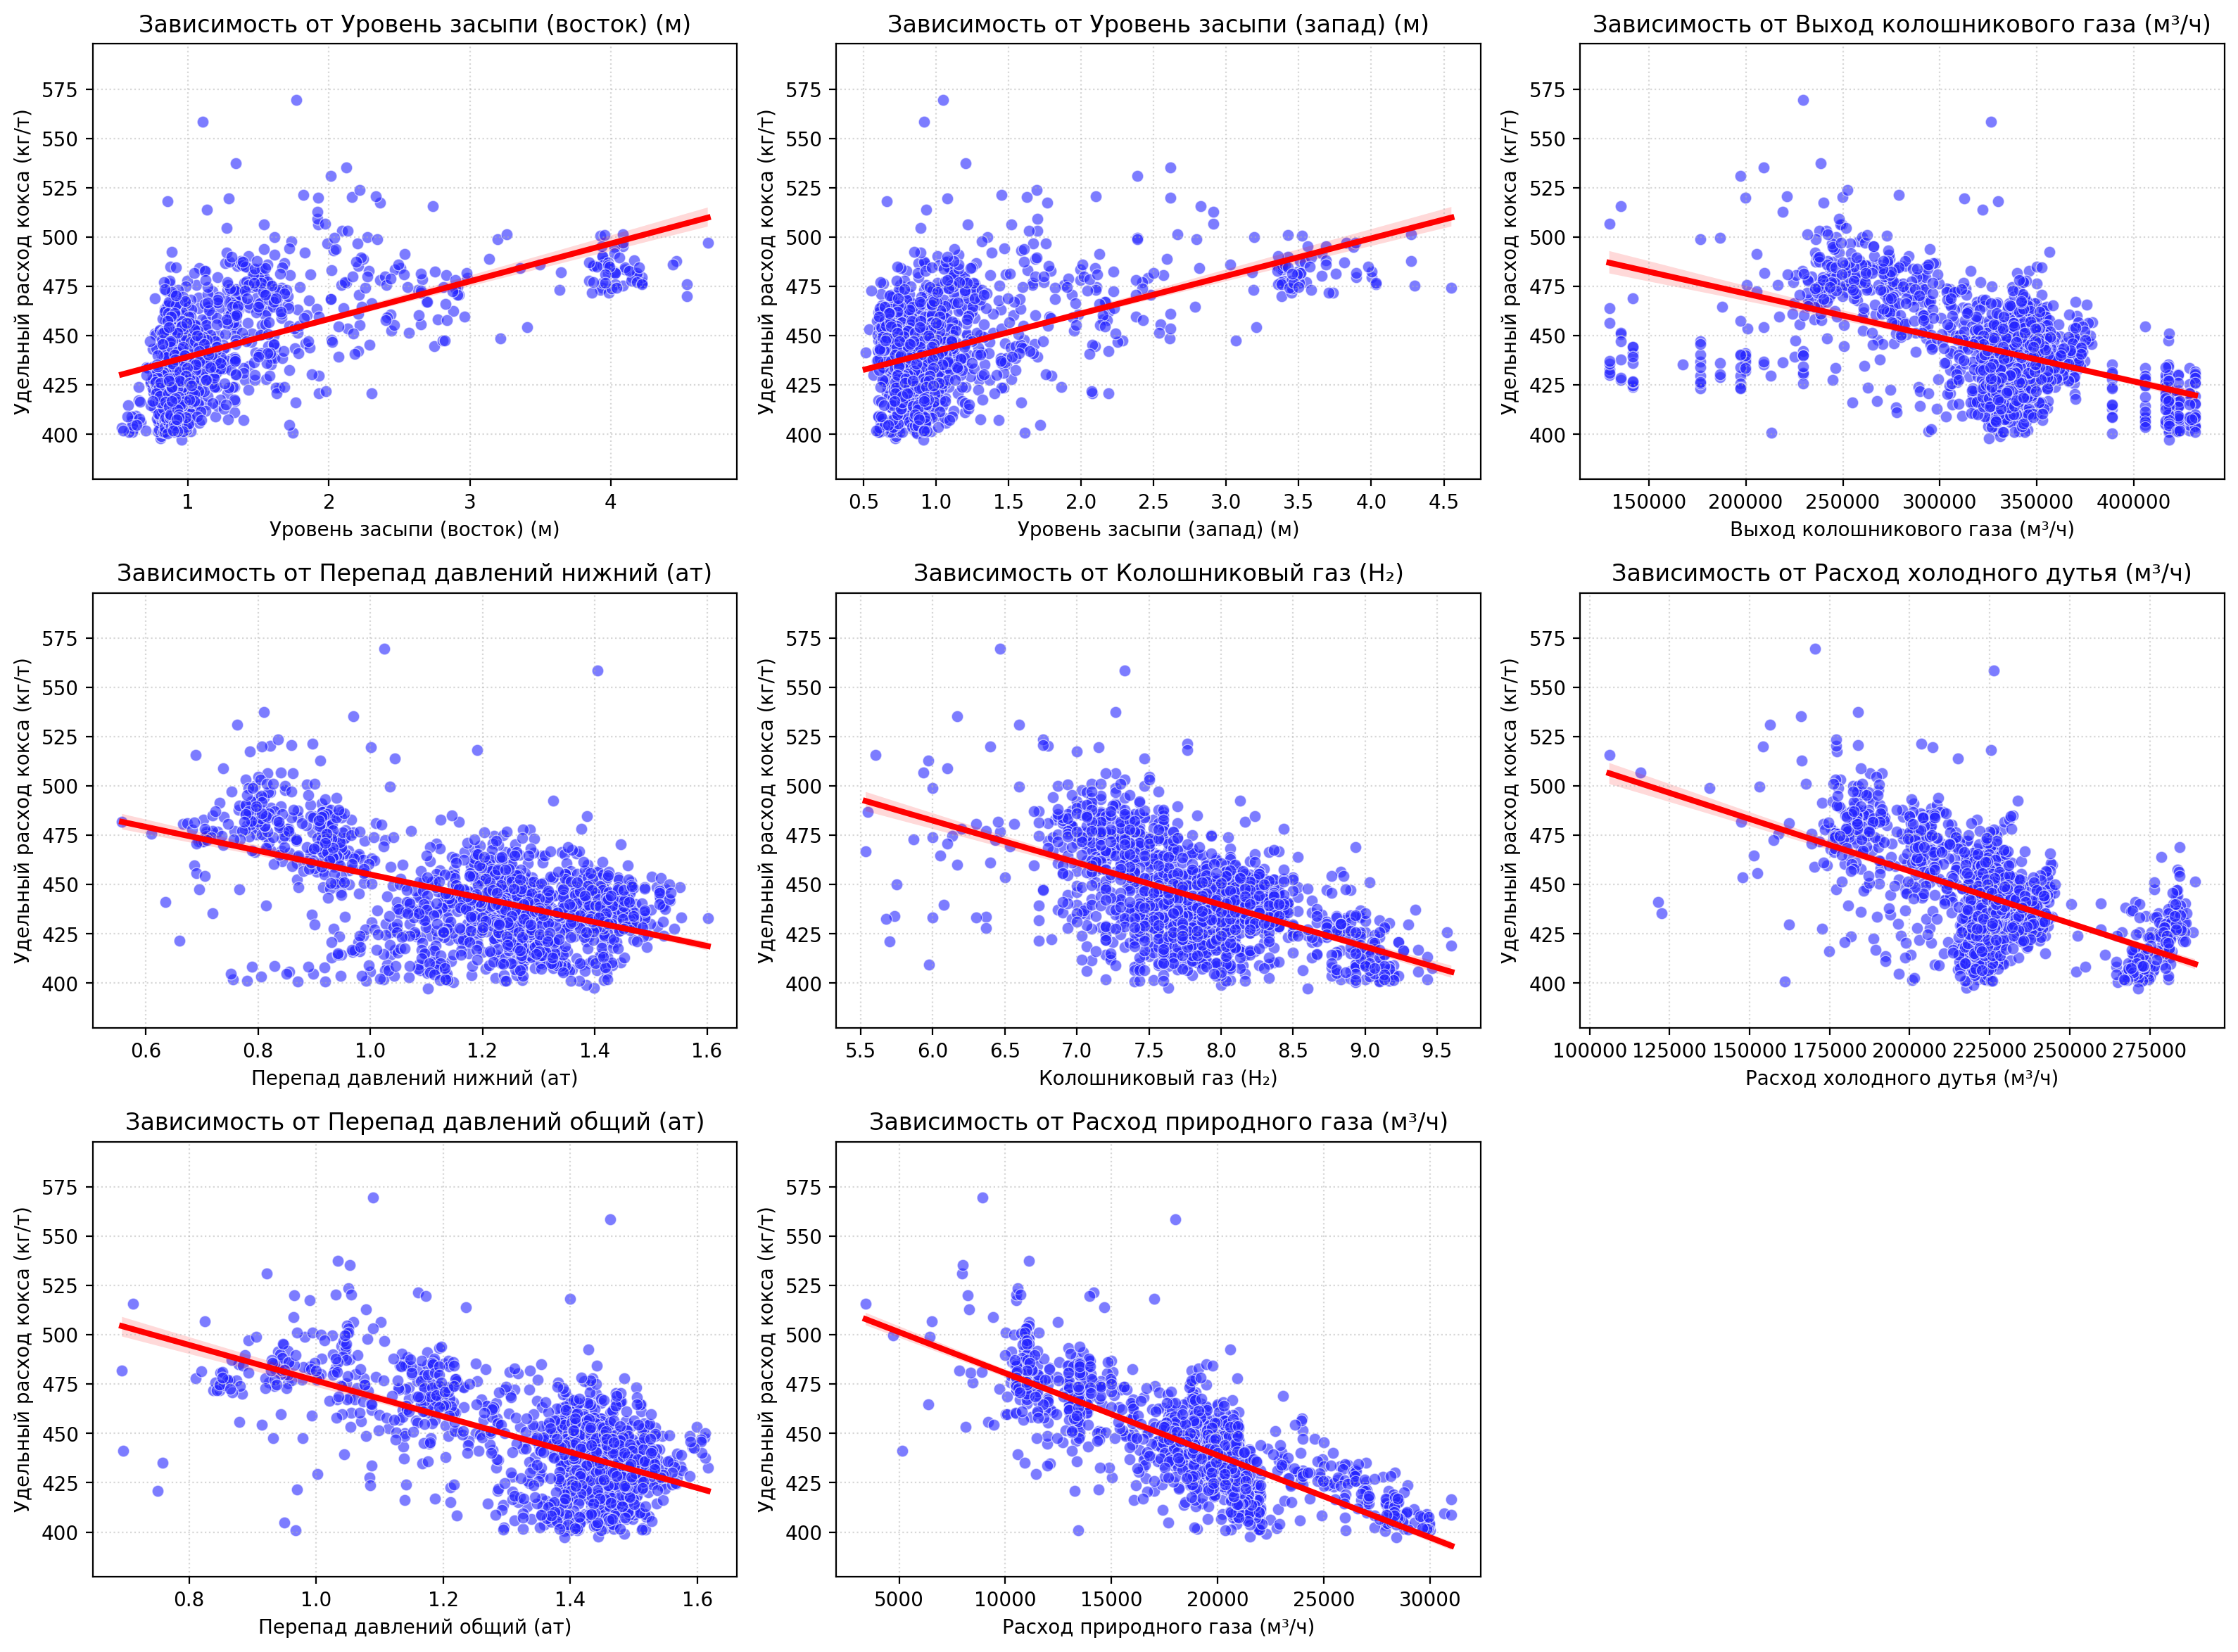

In [138]:
fig, axes = plt.subplots(n_rows_coke, n_cols_coke, figsize=(16, 4*n_rows_coke))
fig.suptitle(None)

for i, feature in enumerate(top_features_coke):
    ax = axes.flatten()[i] if n_features_coke > 1 else axes

    sns.scatterplot(x=df[feature], y=df['Удельный расход кокса (кг/т)'], color='#2525FF', alpha=0.6, ax=ax)

    # Здесь заглядываем в будущее, строя линию линейной регрессии
    sns.regplot(x=df[feature], y=df['Удельный расход кокса (кг/т)'], scatter=False, color='#FF0000', line_kws={'linewidth': 3}, ax=ax)

    ax.set_title(f"Зависимость от {feature}", fontsize=12)
    ax.set_xlabel(feature, fontsize=10)
    ax.set_ylabel('Удельный расход кокса (кг/т)', fontsize=10)
    ax.set_ylim(y_min_coke, y_max_coke)

    ax.grid(True, linestyle=':', alpha=0.5)

[fig.delaxes(ax) for ax in axes.flatten()[n_features_coke:]]
plt.tight_layout()
plt.show()

### Итог по анализу признаков

---

#### Корреляция >= 0.5
«Уровень засыпи (восток)» (0.57) – повышенный уровень засыпи с восточной стороны может нарушать равномерность распределения шихты, увеличивая расход кокса.

«Уровень засыпи (запад)» (0.52) – аналогично восточному уровню, высокий уровень на западе ухудшает газопроницаемость, что приводит к менее эффективному восстановлению и повышенному расходу кокса.

---

#### Корреляция <= -0.5
«Выход колошникового газа (м³/ч)» (-0.51) – увеличение выхода колошникового газа может свидетельствовать о более эффективном использовании восстановительных газов, снижая потребность в коксе.

«Перепад давлений нижний (ат)» (-0.52) – меньший перепад давлений в нижней зоне печи указывает на лучшую газопроницаемость, что способствует оптимизации расхода кокса.

«Колошниковый газ (H₂)» (-0.54) – повышенное содержание водорода в колошниковом газе частично замещает углерод в восстановительных реакциях, уменьшая удельный расход кокса.

«Расход холодного дутья (м³/ч)» (-0.57) – увеличение подачи холодного дутья может снижать температуру в печи, но также уменьшает потребность в коксе за счёт изменения теплового баланса.

«Перепад давлений общий (ат)» (-0.63) – меньший общий перепад давлений свидетельствует о стабильности газодинамики в печи, что ведёт к снижению расхода кокса.

«Расход природного газа (м³/ч)» (-0.77) – природный газ выступает частичным заменителем кокса, значительно снижая его удельный расход благодаря использованию водорода и углеводородов в восстановительных процессах.

----

# Скачиваем датасеты

In [121]:
from google.colab import files

In [122]:
df_chugun = df[[target_1] + list(top_features_chugun)]

In [123]:
df_chugun

Количество чугуна (т)  Перепад давлений общий (ат)  \
0                  4359.847                     1.263071   
1                  4425.385                     1.251254   
2                  4372.657                     1.266771   
3                  4447.549                     1.287075   
4                  4441.511                     1.259818   
...                     ...                          ...   
1548               5141.843                     1.415406   
1549               5251.577                     1.410153   
1550               5305.734                     1.383210   
1551               5360.082                     1.406916   
1552               5288.666                     1.414384   

      Перепад давлений нижний (ат)  Расход природного газа (м³/ч)  \
0                         0.961892                    15916.95805   
1                         0.961920                    15998.28292   
2                         0.978648                    15984.38981   
3                         0.990443                    15975.46354   
4                         0.960610                    15999.31665   
...                            ...                            ...   
1548                      1.114516                    29951.71387   
1549                      1.138146                    29905.31812   
1550                      1.123840                    29838.85042   
1551                      1.134008                    29622.66935   
1552                      1.132663                    29912.03947   

      Расход холодного дутья (м³/ч)  Выход колошникового газа (м³/ч)  \
0                       214677.1855                      307399.0456   
1                       214572.0651                      309399.2344   
2                       216907.2760                      311839.3307   
3                       217341.6706                      312108.1797   
4                       223169.5814                      319017.8099   
...                             ...                              ...   
1548                    264492.2077                      418289.3203   
1549                    268069.9850                      421993.7734   
1550                    267186.0690                      422974.8932   
1551                    266981.6263                      423700.3086   
1552                    269118.9583                      429554.9818   

      Колошниковый газ (H₂)  O₂ в горячем дутье  t периферийных газов 4 (°С)  \
0                  7.333333           27.333333                   421.483835   
1                  7.400000           27.233334                   386.978634   
2                  7.566667           27.166667                   366.890850   
3                  7.566667           26.833333                   310.773481   
4                  7.633333           27.000000                   301.118645   
...                     ...                 ...                          ...   
1548               9.133333           28.066666                   668.490804   
1549               9.200000           27.800000                   635.670158   
1550               8.933333           27.866666                   591.585195   
1551               9.133333           27.900000                   535.702292   
1552               9.066667           28.433333                   634.297491   

      t колошникового газа 2 (°С)  t колошникового газа 1 (°С)  \
0                      175.343535                   169.780254   
1                      173.247252                   169.744034   
2                      166.500430                   165.301828   
3                      159.559399                   157.926989   
4                      152.145464                   149.805531   
...                           ...                          ...   
1548                   205.292570                   182.717968   
1549                   206.771612                   180.412993   
1550                   193.907042   

In [124]:
df_chugun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1553 entries, 0 to 1552
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Количество чугуна (т)            1553 non-null   float64
 1   Перепад давлений общий (ат)      1553 non-null   float64
 2   Перепад давлений нижний (ат)     1553 non-null   float64
 3   Расход природного газа (м³/ч)    1553 non-null   float64
 4   Расход холодного дутья (м³/ч)    1553 non-null   float64
 5   Выход колошникового газа (м³/ч)  1553 non-null   float64
 6   Колошниковый газ (H₂)            1553 non-null   float64
 7   O₂ в горячем дутье               1553 non-null   float64
 8   t периферийных газов 4 (°С)      1553 non-null   float64
 9   t колошникового газа 2 (°С)      1553 non-null   float64
 10  t колошникового газа 1 (°С)      1553 non-null   float64
 11  Уровень засыпи (север) (м)       1553 non-null   float64
 12  t периферийных газов

In [125]:
df_coke = df[[target_2] + list(top_features_coke)]

In [126]:
df_coke

Удельный расход кокса (кг/т)  Уровень засыпи (восток) (м)  \
0                       457.062565                     1.336937   
1                       450.109336                     1.609969   
2                       464.184705                     1.434564   
3                       455.028522                     1.313145   
4                       467.232935                     1.204589   
...                            ...                          ...   
1548                    404.566088                     0.906697   
1549                    401.616894                     0.962914   
1550                    401.454022                     0.926343   
1551                    402.017341                     0.892051   
1552                    407.751670                     0.919333   

      Уровень засыпи (запад) (м)  Выход колошникового газа (м³/ч)  \
0                       1.007742                      307399.0456   
1                       1.212071                      309399.2344   
2                       1.033959                      311839.3307   
3                       1.019543                      312108.1797   
4                       0.825335                      319017.8099   
...                          ...                              ...   
1548                    0.872599                      418289.3203   
1549                    0.913131                      421993.7734   
1550                    0.938502                      422974.8932   
1551                    0.919194                      423700.3086   
1552                    0.883931                      429554.9818   

      Перепад давлений нижний (ат)  Колошниковый газ (H₂)  \
0                         0.961892               7.333333   
1                         0.961920               7.400000   
2                         0.978648               7.566667   
3                         0.990443               7.566667   
4                         0.960610               7.633333   
...                            ...                    ...   
1548                      1.114516               9.133333   
1549                      1.138146               9.200000   
1550                      1.123840               8.933333   
1551                      1.134008               9.133333   
1552                      1.132663               9.066667   

      Расход холодного дутья (м³/ч)  Перепад давлений общий (ат)  \
0                       214677.1855                     1.263071   
1                       214572.0651                     1.251254   
2                       216907.2760                     1.266771   
3                       217341.6706                     1.287075   
4                       223169.5814                     1.259818   
...                             ...                          ...   
1548                    264492.2077                     1.415406   
1549                    268069.9850                     1.410153   
1550                    267186.0690                     1.383210   
1551                    266981.6263                     1.406916   
1552                    269118.9583                     1.414384   

      Расход природного газа (м³/ч)  
0                       15916.95805  
1                       15998.28292  
2                       15984.38981  
3                       15975.46354  
4                       15999.31665  
...                             ...  
1548                    29951.71387  
1549                    29905.31812  
1550                    29838.85042  
1551                    29622.66935  
1552                    29912.03947  

[1553 rows x 9 columns]

In [127]:
df_coke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1553 entries, 0 to 1552
Data columns (total 9 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Удельный расход кокса (кг/т)     1553 non-null   float64
 1   Уровень засыпи (восток) (м)      1553 non-null   float64
 2   Уровень засыпи (запад) (м)       1553 non-null   float64
 3   Выход колошникового газа (м³/ч)  1553 non-null   float64
 4   Перепад давлений нижний (ат)     1553 non-null   float64
 5   Колошниковый газ (H₂)            1553 non-null   float64
 6   Расход холодного дутья (м³/ч)    1553 non-null   float64
 7   Перепад давлений общий (ат)      1553 non-null   float64
 8   Расход природного газа (м³/ч)    1553 non-null   float64
dtypes: float64(9)
memory usage: 109.3 KB


In [128]:
df_chugun.to_csv('ML_intensive_final_project_correlation_chugun.csv', index=False)
df_coke.to_csv('ML_intensive_final_project_correlation_coke.csv', index=False)

In [129]:
# files.download('ML_intensive_final_project_correlation_chugun.csv')
# files.download('ML_intensive_final_project_correlation_coke.csv')